### ITALIAN EARTHQUAKE CATALOGUE: EDA

#### Below, I put some of the plots that I used in my Thesis. Look here to check more advanced plots, statistical analysis and an explanation of the plot results: 
https://github.com/Iron486/Bachelor_Thesis
    

In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/italian-earthquake-catalogue-1985-2020/Italian_Catalogue.csv


In [78]:
DATA=pd.read_csv(
'/kaggle/input/italian-earthquake-catalogue-1985-2020/Italian_Catalogue.csv')
DATA.drop(columns=DATA.columns.values[0],inplace=True) #drop the first column
DATA

,#EventID,Time,Latitude,Longitude,Depth/Km,Author,MagType,Magnitude,EventLocationName
0,79,1985-01-02 23:26:09.581820,41.7150,13.9410,5.8,BULLETIN-VAX,Md,2.6,6 km S Civitella Alfedena (AQ)
1,89,1985-01-03 01:14:43.481820,41.6770,13.9310,6.1,BULLETIN-VAX,Md,2.5,6 km NE Picinisco (FR)
2,199,1985-01-04 17:26:06.731820,46.1580,7.1740,10.0,BULLETIN-VAX,M,3.8,Confine Italia-Svizzera (SVIZZERA)
3,229,1985-01-05 00:28:21.311820,45.3380,6.6410,5.0,BULLETIN-VAX,M,3.7,Confine Italia-Francia (FRANCIA)
4,239,1985-01-05 04:15:30.131820,45.4090,6.6270,10.0,BULLETIN-VAX,M,3.2,Confine Italia-Francia (FRANCIA)
...,...,...,...,...,...,...,...,...,...
181772,24334191,2020-04-29 11:45:50.661820,45.9167,12.1917,10.1,SURVEY-INGV,ML,1.7,2 km SW Refrontolo (TV)
181773,24335541,2020-04-29 14:43:14.461820,38.4090,13.5617,28.2,SURVEY-INGV,ML,2.3,Costa Siciliana centro-settentrionale (Palermo)
181774,24336421,2020-04-29 16:52:06.501820,42.8882,13.0363,10.0,SURVEY-INGV,ML,1.8,1 km N Preci (PG)
181775,24336481,2020-04-29 16:58:41.341820,37.7683,14.6293,38.0,SURVEY-INGV,ML,2.2,3 km SE Troina (EN)


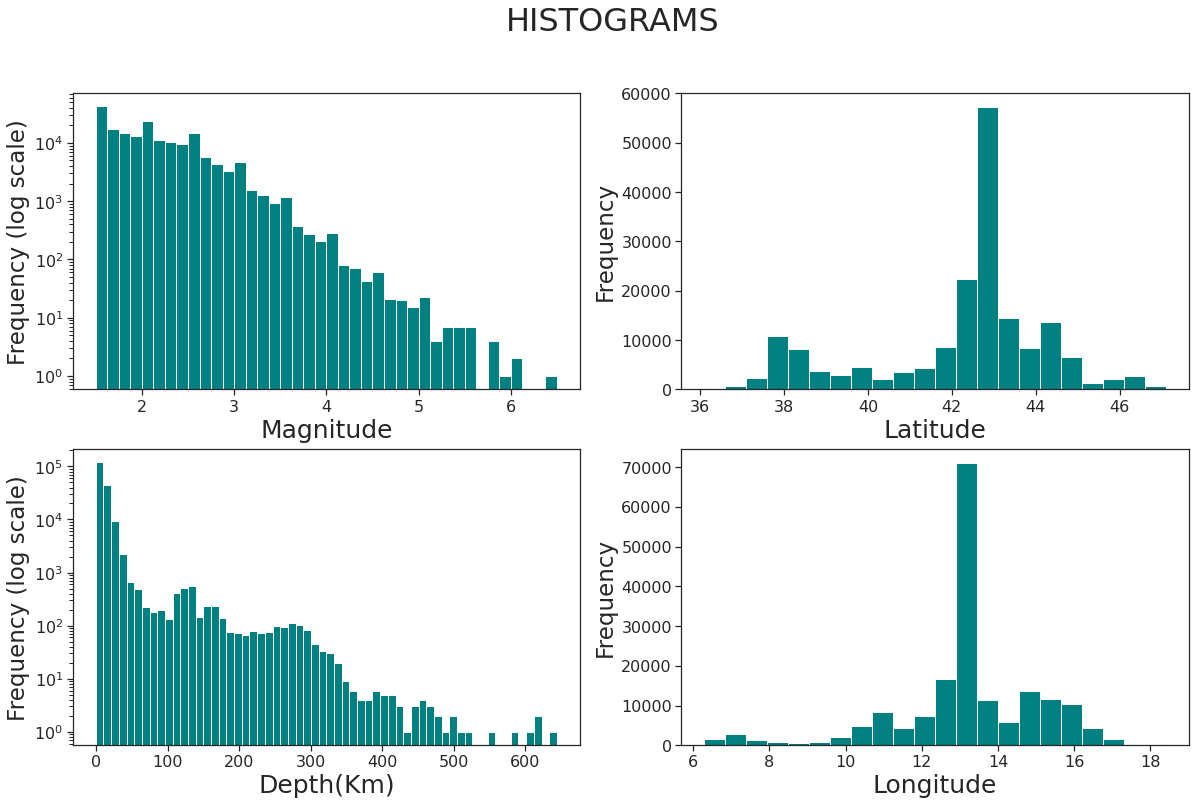

In [79]:
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('HISTOGRAMS',fontsize=32)
# Draw a nested boxplot 
axes[0][0].hist(DATA['Magnitude'],bins=40,color='teal')
axes[1][0].hist(DATA['Depth/Km'],bins=60,color='teal')
axes[0][1].hist(DATA['Latitude'],bins=22,color='teal')
axes[1][1].hist(DATA['Longitude'],bins=22,color='teal')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Magnitude",fontsize=25) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23) #set font and title of y label
            ax.set_yscale('log') #set log scale
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Depth(Km)",fontsize=25)
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23)
            ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i == 0 and j==1:
            title = ax.set_xlabel("Latitude",fontsize=25  ) 
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            title = ax.set_xlabel("Longitude", fontsize=25 )
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            ax.tick_params(labelsize=16)
#ax1.title.set_text('First Plot') title of the first plot
#comment this histograms
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\histograms.png",dpi=600)

Text(0.5, 1.0, 'Magnitude type by frequency')

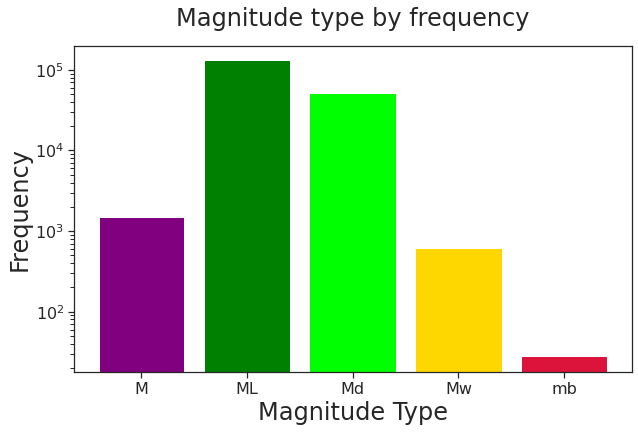

In [80]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
list_1=[1 for i in range(181777)]
DATA['ones']=list_1

grouped=DATA.loc[:,'ones'].groupby(DATA['MagType'])
DATA['MagType'].sort_values(ascending=False) 
grouped_DATA_Magnitude=grouped.sum()
index_grouped_DATA_Magnitude=grouped_DATA_Magnitude.index
ax1=plt.bar(index_grouped_DATA_Magnitude,grouped_DATA_Magnitude,color='purple')#,align='left')
plt.xlabel("Magnitude Type",fontsize=24) #set font and title of x label
plt.ylabel("Frequency",fontsize=24) #set font and title of y label
plt.yscale('log')
ax1[1].set_color('green')
ax1[2].set_color('lime')
ax1[3].set_color('gold')
ax1[4].set_color('crimson')
plt.tick_params(labelsize=16) #change labelsize
plt.title("Magnitude type by frequency",fontsize=24,pad=20)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Violin plots of magnitude by magnitude type')

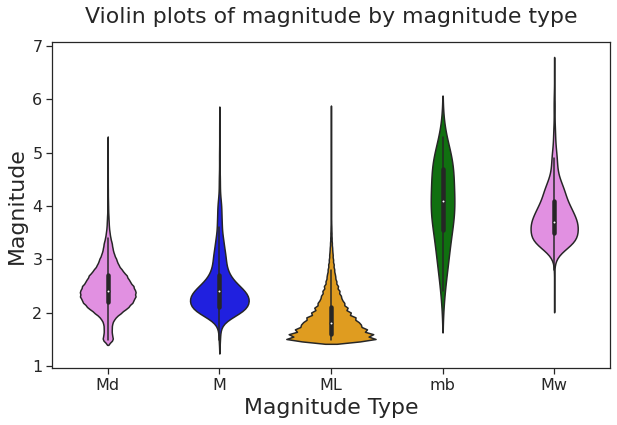

In [81]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
my_pal = {"Md":'violet', "M":'blue', "ML":'orange', "mb":'green', "Mw":"violet"}
sns.violinplot(DATA['MagType'],DATA['Magnitude'],palette=my_pal)
plt.xlabel("Magnitude Type",fontsize=22,labelpad=5) #set font and title of x label
plt.ylabel("Magnitude",fontsize=22,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=16) #change labelsize
plt.title('Violin plots of magnitude by magnitude type',fontsize=22,pad=19)

In [82]:
from datetime import datetime
list_1=[1 for i in range(181777)]
DATA['ones']=list_1
function = lambda z: z[:4] 
time=DATA['Time']
time=time.map(function) #if you run the script multiple times, strange things happen
#DATA['Time']=pd.to_datetime(DATA['Time'])
time

0         1985
1         1985
2         1985
3         1985
4         1985
          ... 
181772    2020
181773    2020
181774    2020
181775    2020
181776    2020
Name: Time, Length: 181777, dtype: object

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Magnitude types throughout the years')

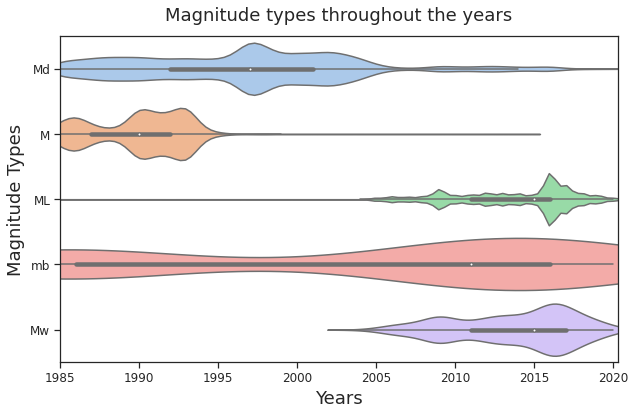

In [83]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
a=time.to_numpy().astype(np.float32)
b=DATA['MagType'].to_numpy()
sns.violinplot(a,b,orient='h',scale='width')#,palette=my_pal)
#sns.violinplot(g['MagType'],orient='h',color='green')
#sns.stripplot(g['MagType'],orient='h',color='white')
plt.xlabel("Years",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("Magnitude Types",fontsize=18,labelpad=5)
plt.xlim(1985,2020.3)
plt.tick_params(labelsize=12)
plt.title('Magnitude types throughout the years',fontsize=18,pad=15.5)

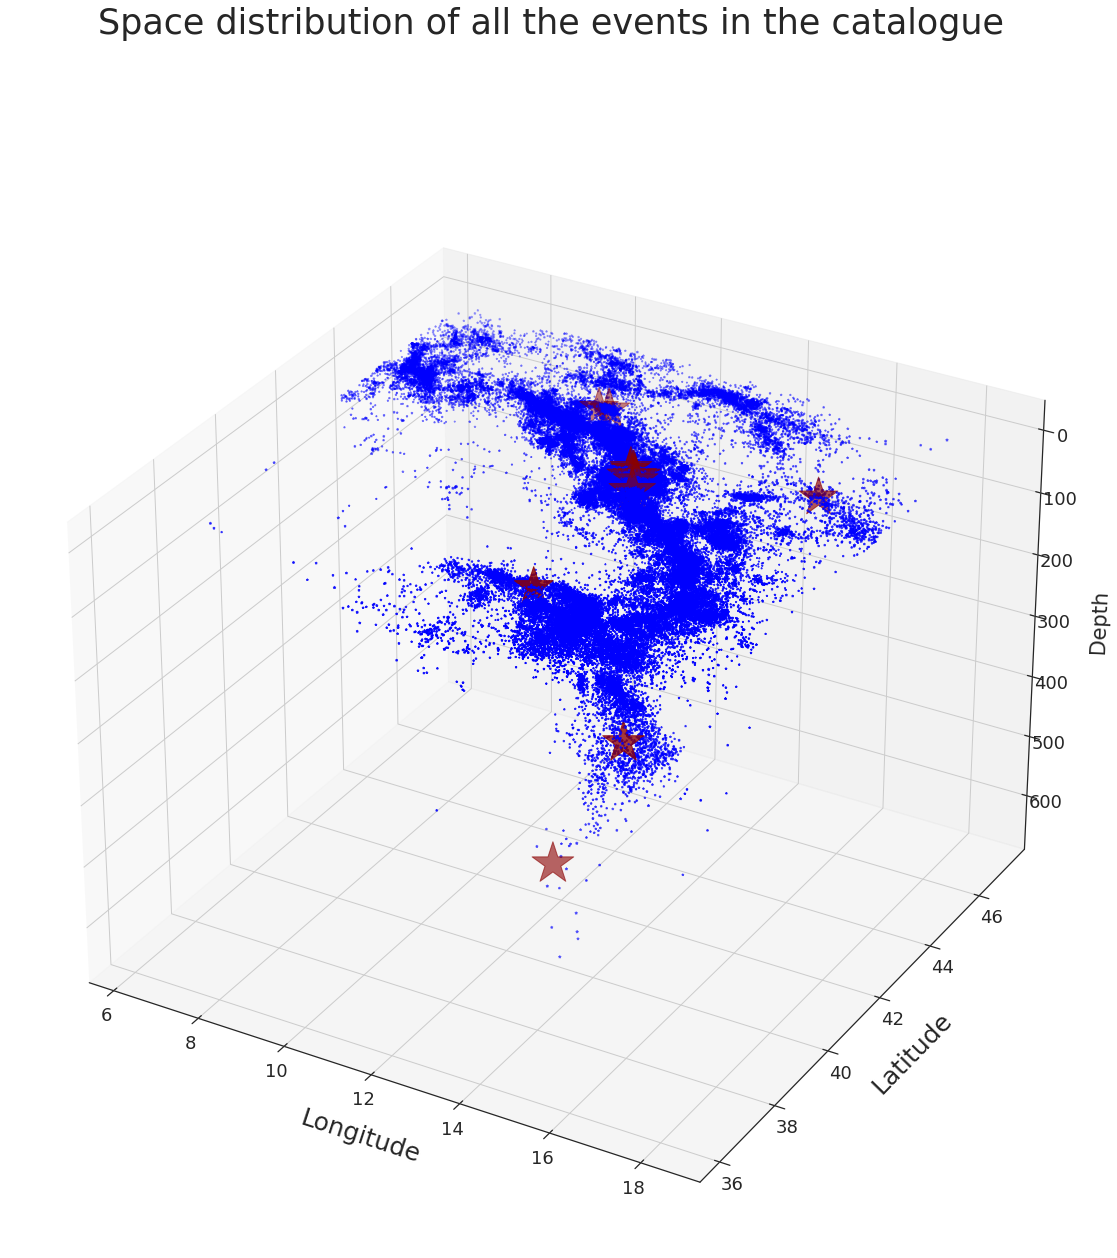

In [84]:
DATA['Time']=pd.to_datetime(DATA['Time'])

from datetime import datetime
#convert datetime 64 to datetime
dt = datetime.utcnow() 
dt64 = np.datetime64(dt)
time_new=[]
for i in DATA['Time']:
    ts = (dt64 - np.datetime64(i)) / np.timedelta64(1, 's')
    times=datetime.utcfromtimestamp(ts)
    time_new.append(times)
tm=(DATA['Time']< datetime(2020,4,1,0,0,0))& (DATA['Time']>=datetime(1985,1,1,0,0,0) ) #modify interval of time
DATA_2018_2019=DATA[tm]
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
#colour=excel_data[1]
first=DATA_2018_2019.first_valid_index() 
size=[]
color=[]
w=0
for i in DATA_2018_2019['Magnitude']:
    if i < 5.6:
        siz=(DATA_2018_2019['Magnitude'].iloc[w])**1.2
        c='blue'
    else:
        siz=(DATA_2018_2019['Magnitude'].iloc[w])**4.3
        c='darkred'
    w+=1
    size.append(siz)
    color.append(c)
ax.scatter(DATA_2018_2019['Longitude'], DATA_2018_2019['Latitude'], DATA_2018_2019['Depth/Km'],s=size, marker='*',c=color)
plt.gca().invert_zaxis() #it inverts z axis
plt.rcParams['xtick.labeltop']
ax.set_title('Eartquakes in 3D')
ax.set_xlabel('Longitude', fontsize=25,labelpad=19)
ax.set_ylabel('Latitude', fontsize=25,labelpad=19)
#ax.yaxis._axinfo['label']['space_factor'] = 3.0
# set z ticks and labels
ax.set_zlabel('Depth', fontsize=21,rotation=0,labelpad=19)
ax.set_title('Space distribution of all the events in the catalogue', fontsize=35,pad=130)
# change fontsize
#for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)
# disable auto rotation
#ax.zaxis.set_rotate_label(False) 
#ax.set_zlabel(fontsize=14)
ax.tick_params(labelsize=18) 
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


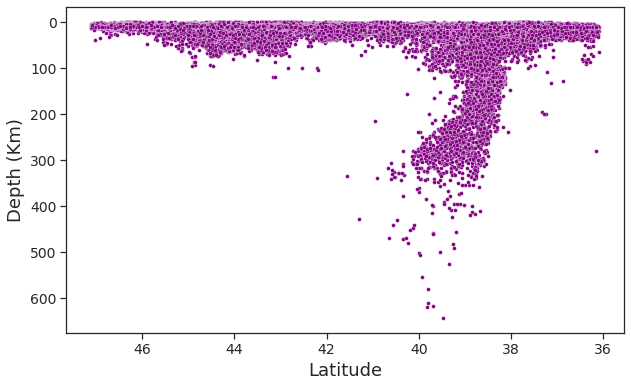

In [85]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(DATA['Latitude'],DATA['Depth/Km'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize
#plt.title('Violin plots of magnitude by magnitude type',fontsize=22,pad=19)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


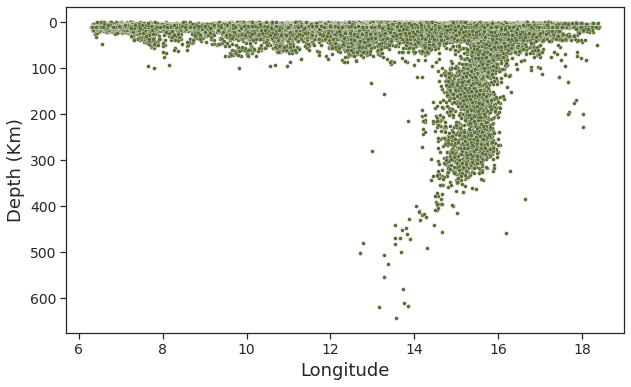

In [86]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(DATA['Longitude'],DATA['Depth/Km'],s=15,color='darkolivegreen')
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize
#plt.title('Violin plots of magnitude by magnitude type',fontsize=22,pad=19)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


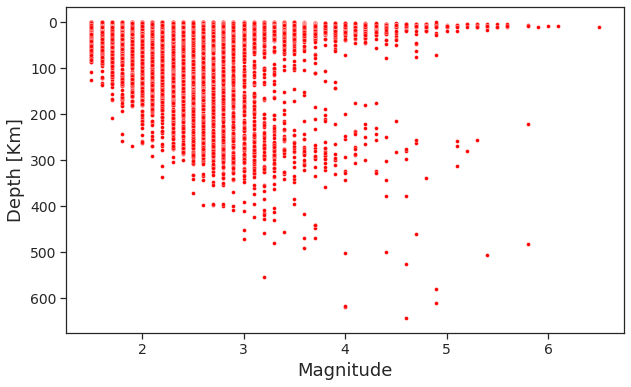

In [87]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(DATA['Magnitude'],DATA['Depth/Km'],s=15,color='red')
plt.gca().invert_yaxis()
plt.xlabel("Magnitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth [Km]',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


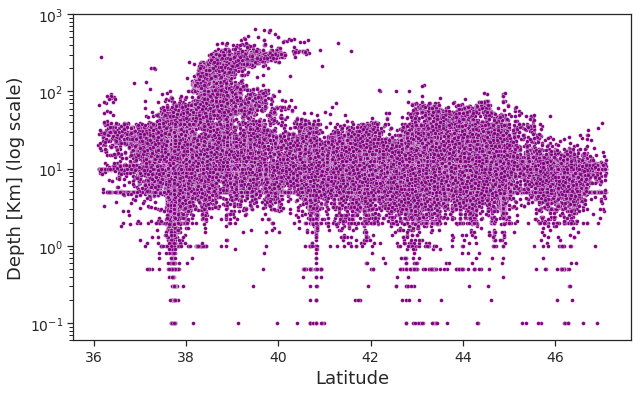

In [88]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(DATA['Latitude'],DATA['Depth/Km'],s=15,color='purple')
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth [Km] (log scale)',fontsize=18,labelpad=5) #set font and title of y label
plt.yscale('log')
plt.ylim(0.06,1000)
plt.tick_params(labelsize=14) #change labelsize
#plt.title('Violin plots of magnitude by magnitude type',fontsize=22,pad=19)

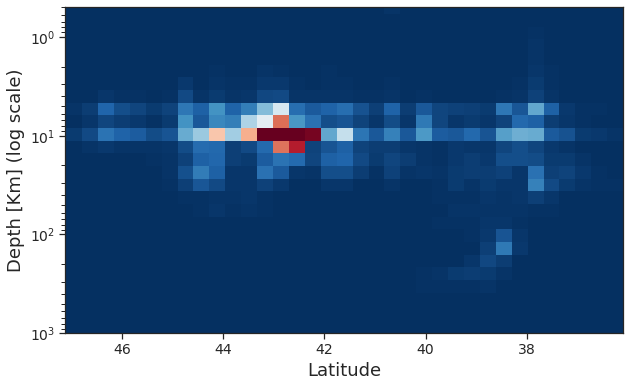

In [89]:
import matplotlib as mpl
fig,axes=plt.subplots(1,1,figsize=(10,6))
ybins = np.logspace(-1,4,num=40) 
cmap = plt.get_cmap('RdBu_r')
norm = plt.Normalize(0,6800)
color = cmap(norm(100.))

plt.hist2d(DATA['Latitude'],DATA['Depth/Km'],bins=(35,ybins),cmap=cmap,norm=norm)#,s=15,color='purple')
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth [Km] (log scale)',fontsize=18,labelpad=5) #set font and title of y label
plt.yscale('log')
plt.ylim(0.5,1000)
plt.xlim(36.1,47.12)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
#plt.colorbar()
plt.tick_params(labelsize=14) #change labelsize
#plt.title('Violin plots of magnitude by magnitude type',fontsize=22,pad=19)

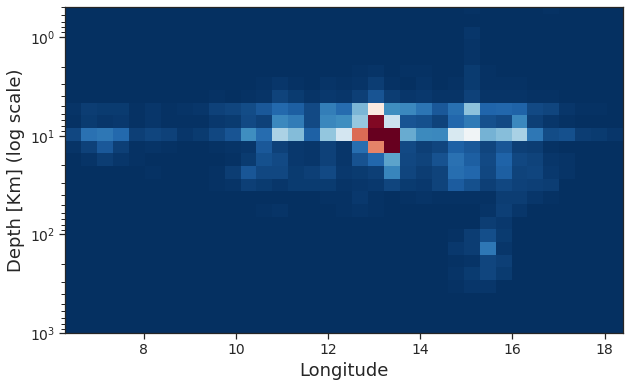

In [90]:
import matplotlib as mpl
fig,axes=plt.subplots(1,1,figsize=(10,6))
ybins = np.logspace(-1,4,num=40) 
cmap = plt.get_cmap('RdBu_r')
norm = plt.Normalize(0,6800)
color = cmap(norm(100.))

plt.hist2d(DATA['Longitude'],DATA['Depth/Km'],bins=(35,ybins),cmap=cmap,norm=norm)#,s=15,color='purple')
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth [Km] (log scale)',fontsize=18,labelpad=5) #set font and title of y label
plt.yscale('log')
plt.ylim(0.5,1000)
#plt.xlim(36.1,47.12)
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()
#plt.colorbar()
plt.tick_params(labelsize=14) #change labelsize
#plt.title('Violin plots of magnitude by magnitude type',fontsize=22,pad=19)

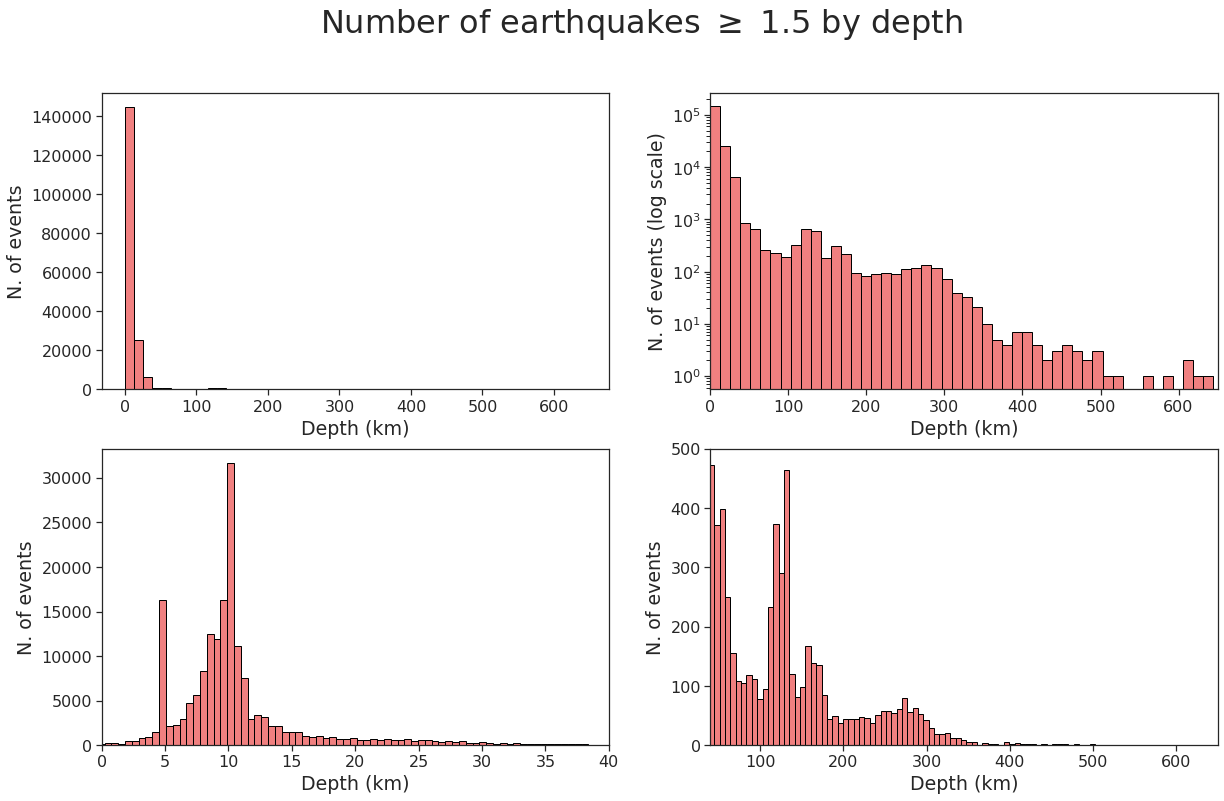

In [91]:
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('Number of earthquakes $\geq$ 1.5 by depth',fontsize=32)
# Draw a nested boxplot 
axes[0][0].hist(DATA['Depth/Km'],edgecolor='black', color='lightcoral',bins=50)
axes[1][0].hist(DATA['Depth/Km'],edgecolor='black', color='lightcoral',bins=1200)
axes[0][1].hist(DATA['Depth/Km'],edgecolor='black', color='lightcoral',bins=50)
axes[1][1].hist(DATA['Depth/Km'],edgecolor='black', color='lightcoral',bins=100)
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('N. of events',fontsize=19,labelpad=5)
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('N. of events',fontsize=19,labelpad=5)
            ax.tick_params(labelsize=16)
            ax.set_xlim(0,40)
        elif i == 0 and j==1:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('N. of events (log scale)',fontsize=19,labelpad=5)
            ax.set_yscale('log')
            ax.set_xlim(0,650)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('N. of events',fontsize=19,labelpad=5)
            ax.tick_params(labelsize=16)
            ax.set_xlim(40,650)
            ax.set_ylim(0,500)
#ax1.title.set_text('First Plot') title of the first plot
#comment this histograms

In [92]:
#we can change conditions according to the magnitude, longitude, latitude, depth etc... that we want to consider.
condition=DATA['Magnitude']>2.9
latitude=(DATA['Latitude']<43.2) &(DATA['Latitude']>42.3)
longitude=(DATA['Longitude']>12.8) &(DATA['Longitude']<13.4)
DATA_windowed=DATA[(condition) & (latitude )& (longitude)]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


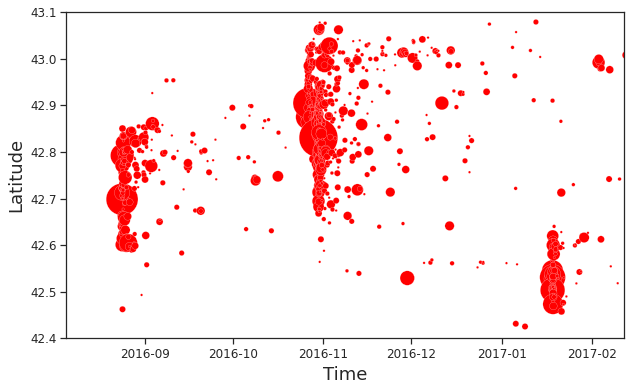

In [93]:
size=[]
marker=[]
w=0
for i in DATA_windowed['Magnitude']:
    siz=(DATA_windowed['Magnitude'].iloc[w])**4.7
    m='o'
    
    w+=1
    size.append(siz)
    marker.append(m)
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(DATA_windowed['Time'],DATA_windowed['Latitude'],size=size,sizes=(6,1490),marker='o',color='red')
#ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel("Time",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("Latitude",fontsize=18,labelpad=5)
plt.tick_params(labelsize=12)
#plt.title('',fontsize=18,pad=15.5)


plt.xlim(datetime(2016,8,5,0,0,0),datetime(2017,2,12,0,0,0))
plt.ylim(42.4,43.1)
plt.legend(['3.0','3','4','5']).set_visible(False)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


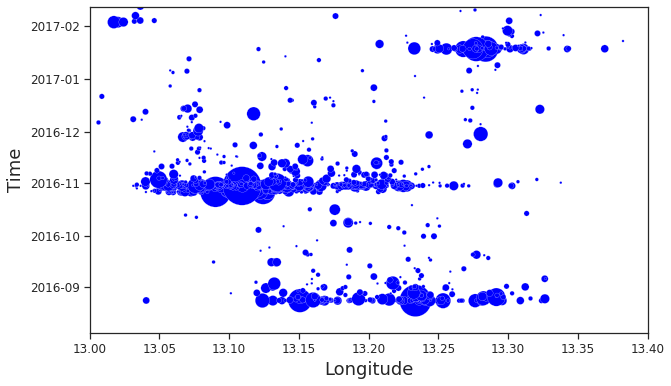

In [94]:
size=[]
marker=[]
w=0
for i in DATA_windowed['Magnitude']:
    siz=(DATA_windowed['Magnitude'].iloc[w])**4.7
    m='o'
    
    w+=1
    size.append(siz)
    marker.append(m)
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(DATA_windowed['Longitude'],DATA_windowed['Time'],size=size,sizes=(6,1490),marker='o',color='blue')
#ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel("Time",fontsize=18,labelpad=5)
plt.tick_params(labelsize=12)
#plt.title('',fontsize=18,pad=15.5)


plt.ylim(datetime(2016,8,5,0,0,0),datetime(2017,2,12,0,0,0))
plt.xlim(13.0,13.4)
plt.legend(['3.0','3','4','5']).set_visible(False)
